# Кластеризация К-Средних - K-Means Clustering

Цель проекта - объединить в кластеры клиентов некоторого банка для маркетинговых целей. 

### Источник данных

https://archive.ics.uci.edu/ml/datasets/bank+marketing

### Значения колонок в датафрейме
Данные о клиентах банка:

Колонка | Определение
--- | -----------
age | возраст (numeric)
job | категория работы (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
marital | семейный статус (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
education | образование (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
default | были ли просрочки по кредиту? (categorical: 'no','yes','unknown')
housing | есть ли кредит на жильё? (categorical: 'no','yes','unknown')
loan | есть ли потребительский кредит? (categorical: 'no','yes','unknown')

Информация о последней коммуникации банка с клиентом в текущей маркетинговой кампании:

Колонка | Определение
--- | -----------
contact | тип коммуникации (categorical: 'cellular','telephone')
 month | месяц года, когда была последняя коммуникация (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
day_of_week | день недели, когда была последняя коммуникация (categorical: 'mon','tue','wed','thu','fri')
duration | длительность последней коммуникации, в секундах (numeric)

Другие атрибуты:

Колонка | Определение
--- | -----------
campaign | сколько раз банк контактировал с клиентом во время текущей маркетинговой кампании, включая последнюю коммуникацию (numeric)
pdays | количество дней, прошедшее с момента последней коммуникации с клиентом во время предыдущей маркетинговой кампании (numeric; 999 - предыдущих коммуникаций не было)
previous | сколько раз банк контактировал с клиентом по время предыдущих маркетинговых кампаний (numeric)
poutcome | результат предыдущих маркетинговых кампаний (categorical: 'failure','nonexistent','success')

Социальные и экономические атрибуты:
Колонка | Определение
--- | -----------
emp.var.rate | коэффициент изменения занятости - квартальный показатель  (numeric)
cons.price.idx | индекс потребительских цен - месячный показатель (numeric)
cons.conf.idx | индекс потребительской уверенности - месячный показатель (numeric)
euribor3m | ставка Euribor (Европейская ставка) на 3 месяца - дневной показатель (numeric)
nr.employed | численность сотрудников – квартальный показатель  (numeric)
subscribed | подписался ли клиент на срочный депозит? (binary: 'yes','no')

### Библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Исследование данных

In [2]:
df = pd.read_csv("bank-full.csv")

In [3]:
df.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


---

### **Анализ непрерывных признаков**

#### Распределение по возрасту

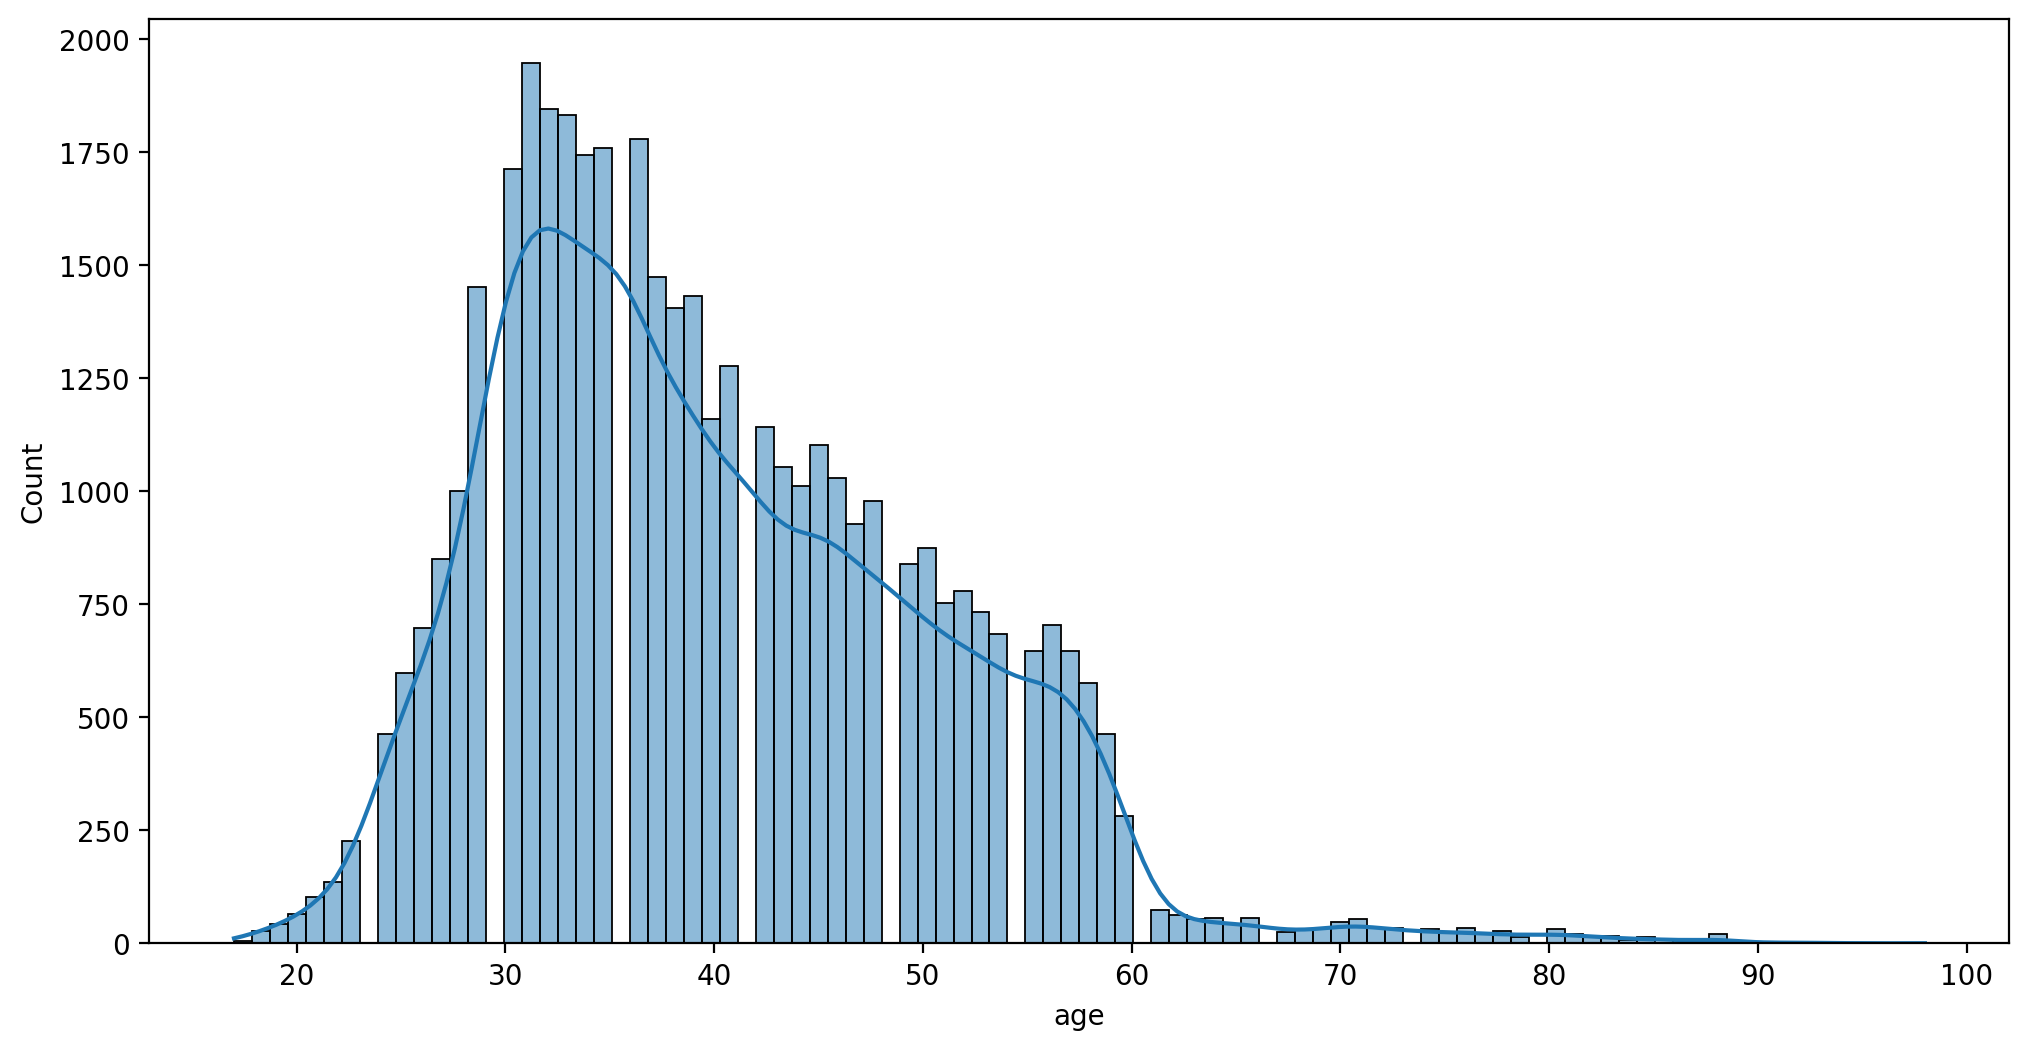

In [8]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df,x='age', kde=True);

* Большая часть рекламных кампаний направлена на более зрелое население.

#### Распределение по колонке 'loan' - наличие потребительского кредита

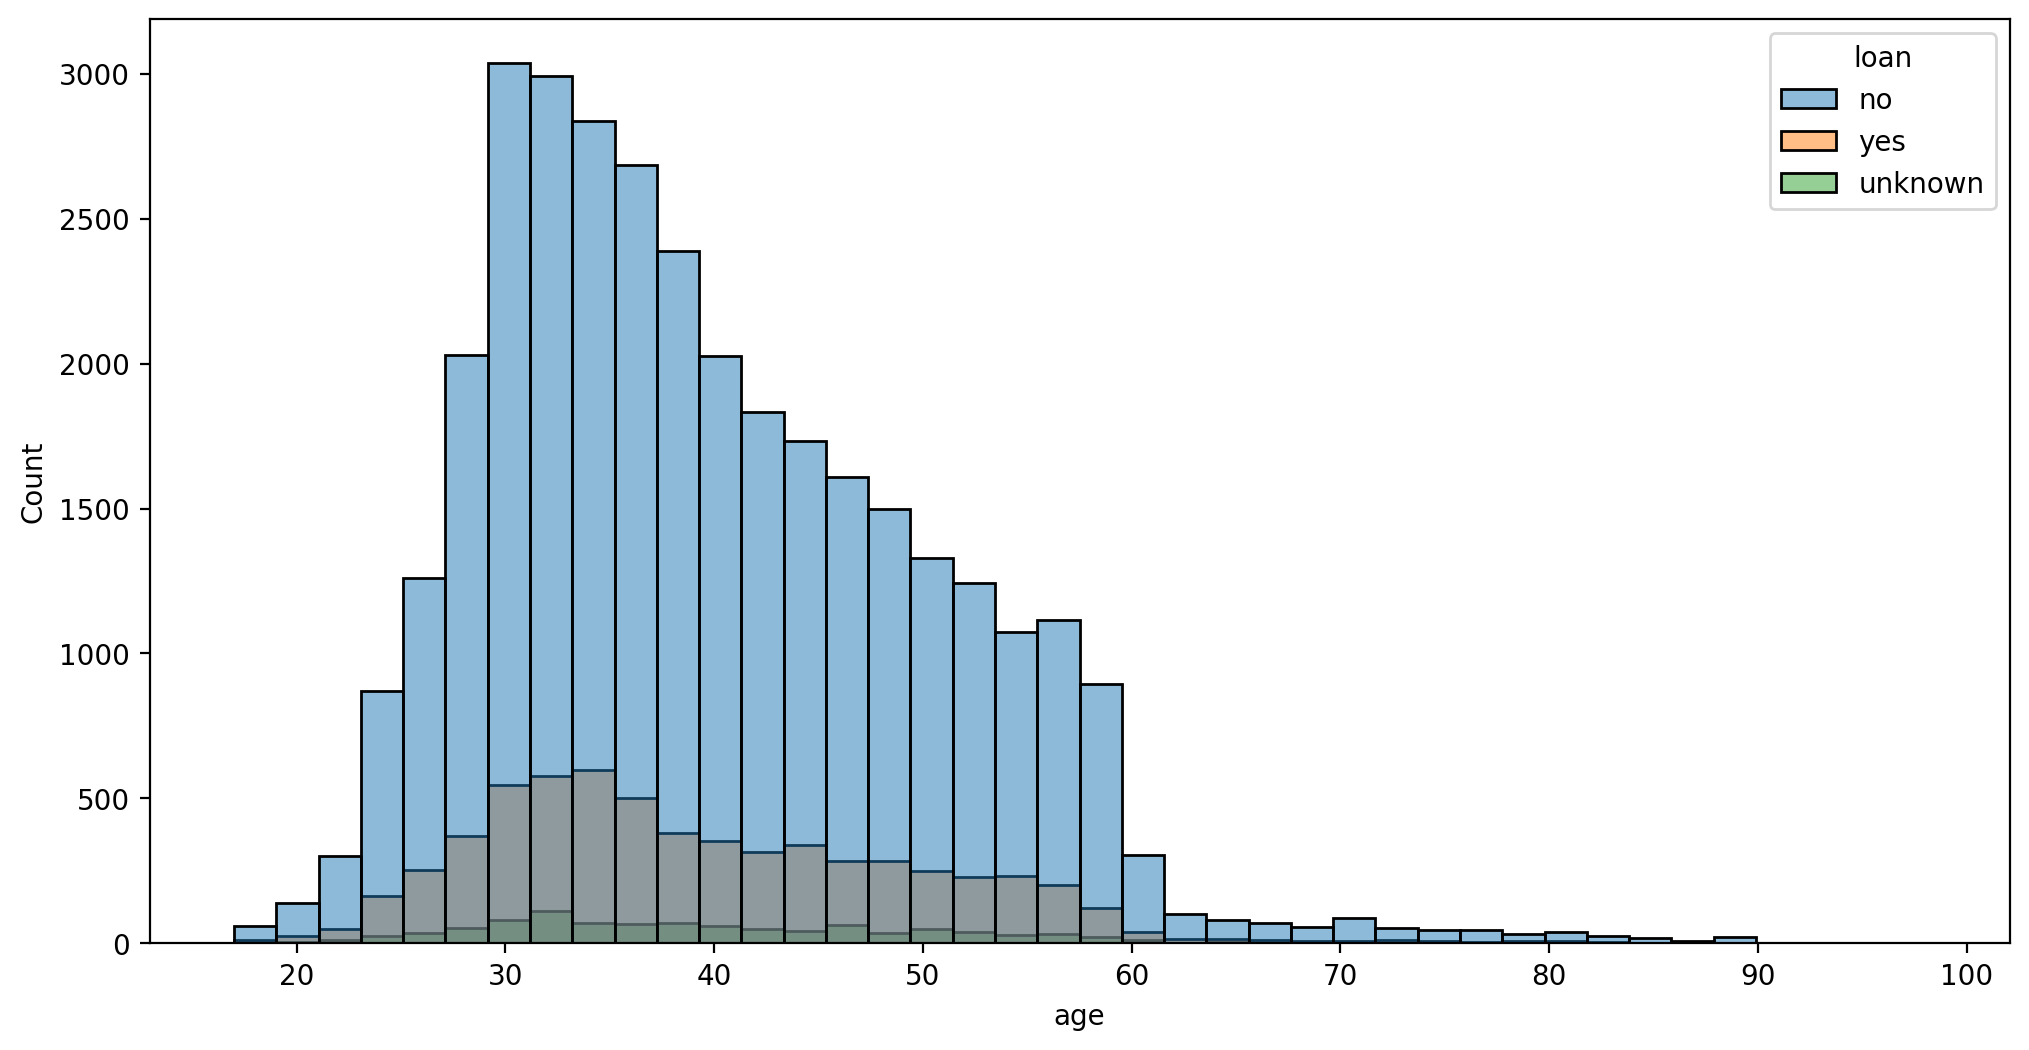

In [12]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',hue='loan', bins = 40);

* Тех, у кого кредита нет, - больше. Это в наших интересах, ведь те, у кого в данный момент кредита нет, будут брать еще один менее охотно.

#### Распределение по длительности телефонного звонка с клиентом

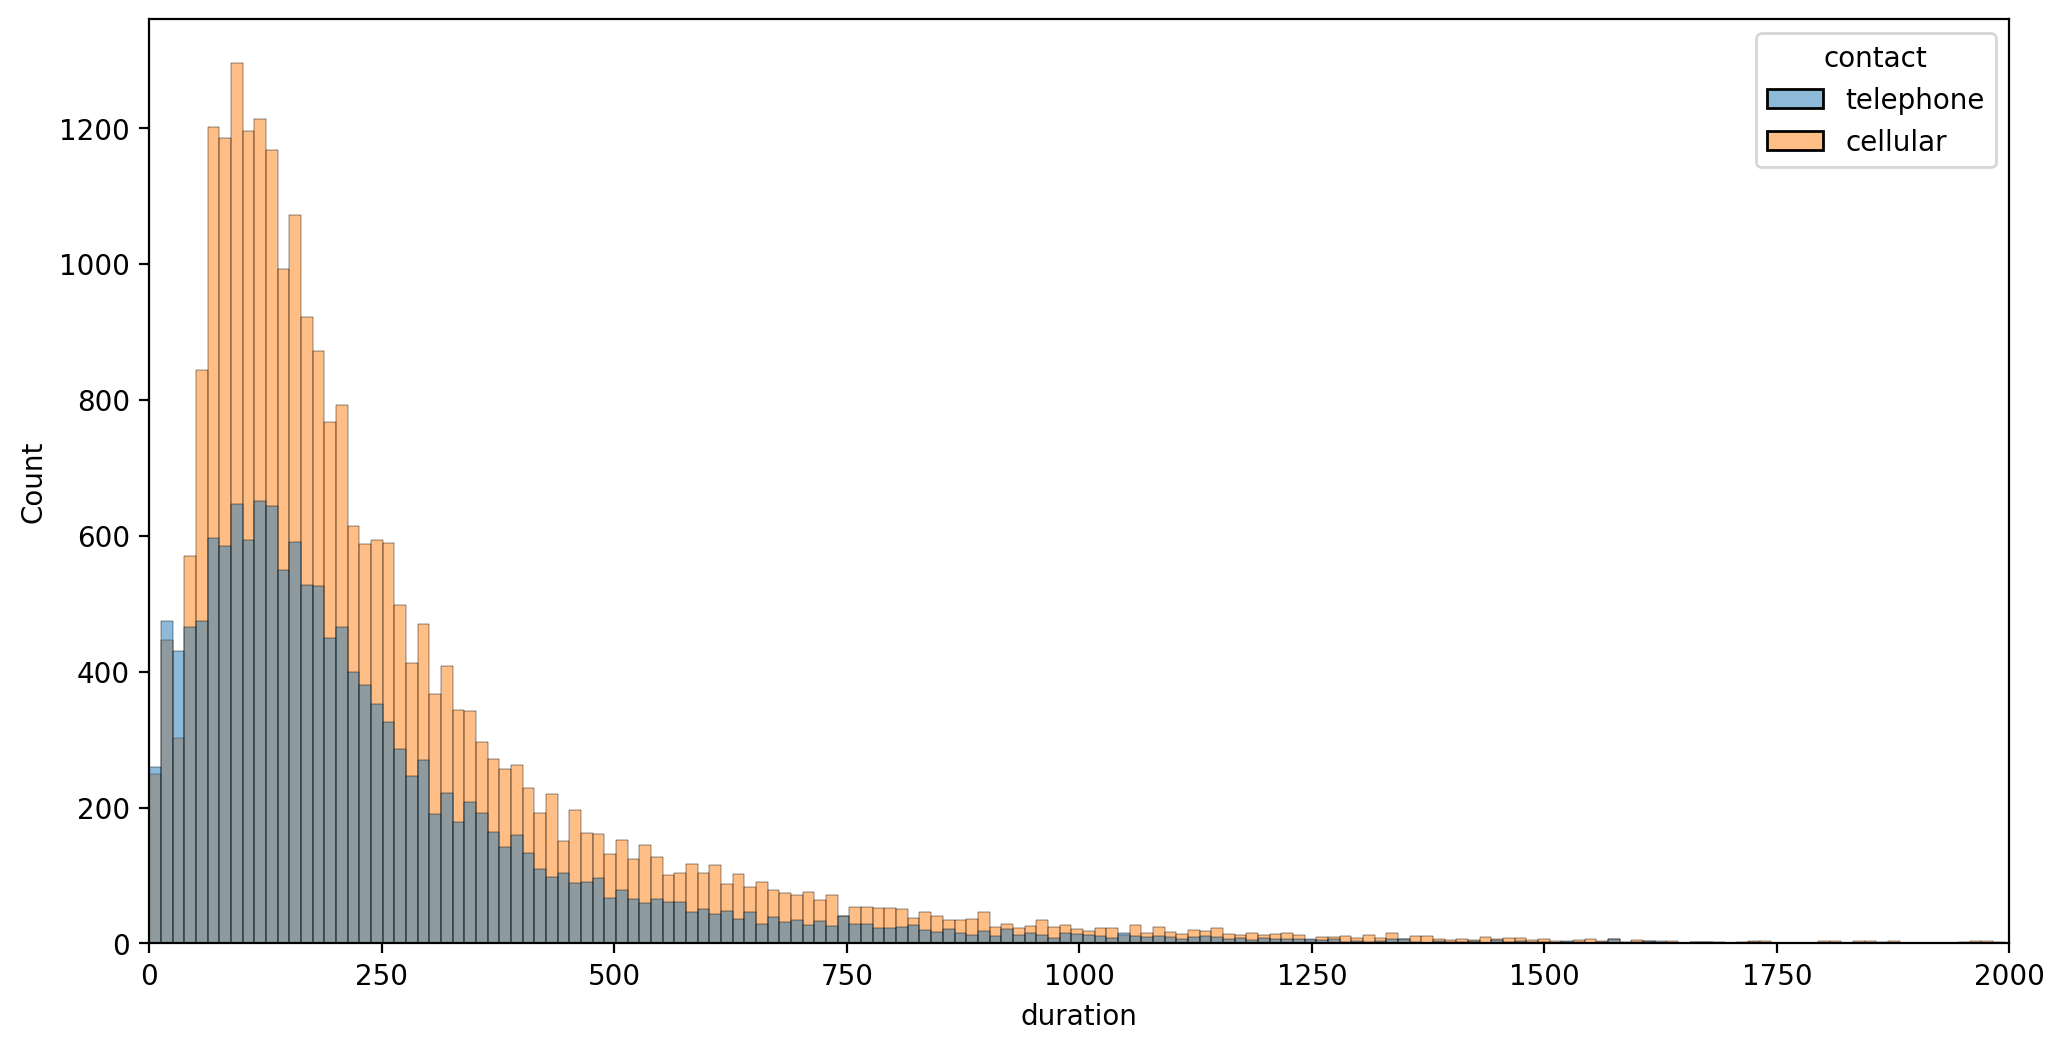

In [13]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000);

* Контактов по мобильному телефону больше.

---

### **Категориальные признаки**

#### Количественный график по профессиям

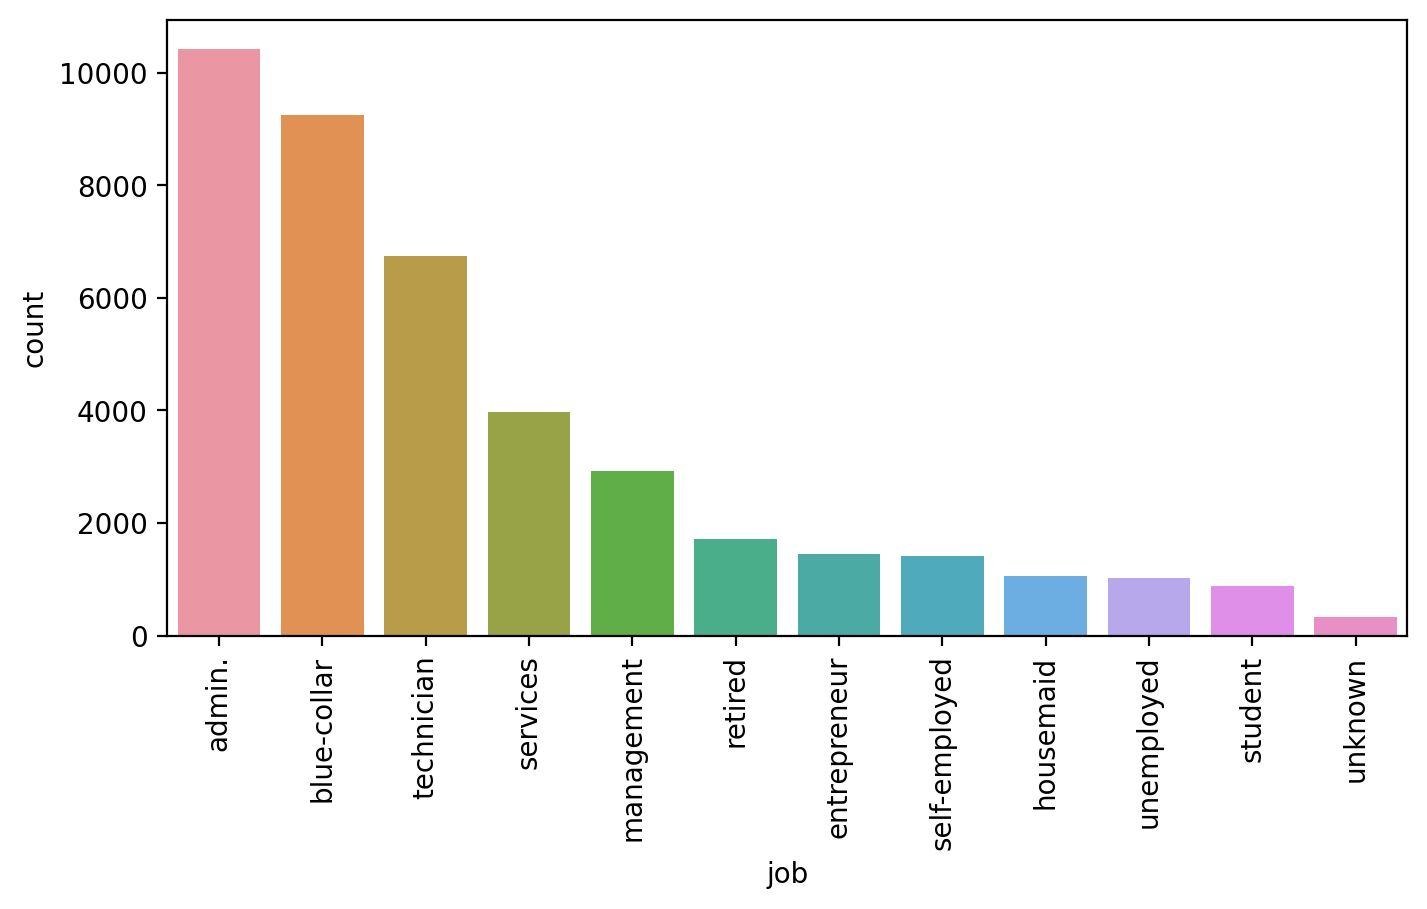

In [29]:
plt.figure (figsize = (8, 4), dpi = 200)
sns.countplot (data = df, x = 'job', order = df['job'].value_counts().index)
plt.xticks (rotation = 90);

* Самые распространенные профессии - администраторы и синие воротнички.

#### График по степени образования

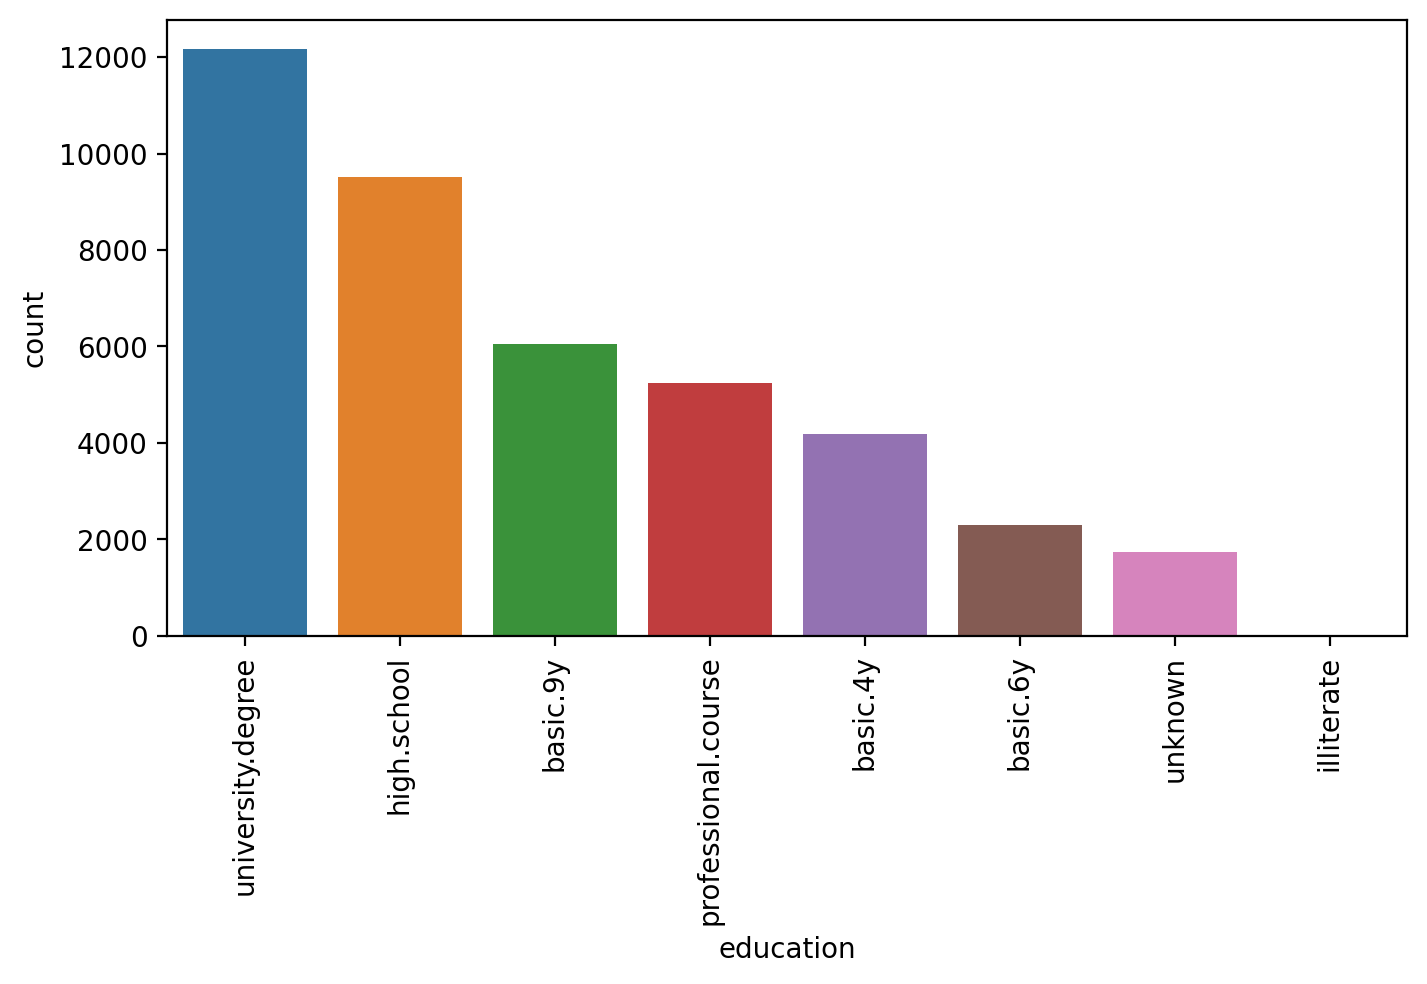

In [28]:
plt.figure (figsize=(8,4), dpi = 200)
sns.countplot(data = df, x = 'education', order = df['education'].value_counts().index)
plt.xticks (rotation = 90);

* Большая часть людей имеет высшее образование.

#### Просрочки по кредиту клиентов в зависимости от степени образования

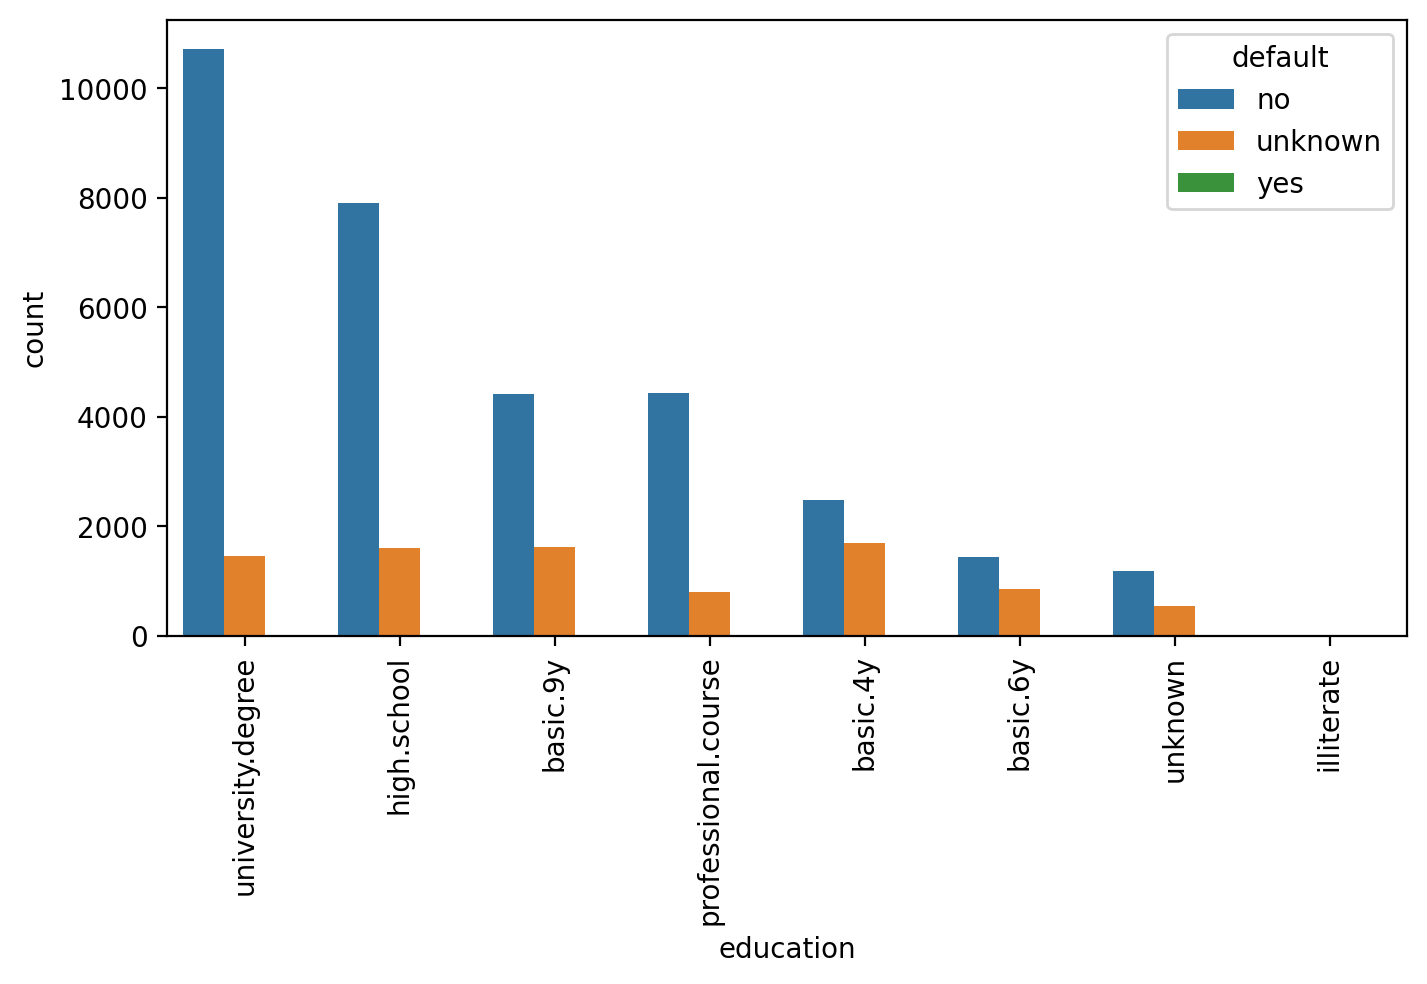

In [33]:
plt.figure (figsize = (8, 4), dpi = 200)
sns.countplot (data = df, x = 'education', order = df['education'].value_counts().index, hue = 'default')
plt.xticks (rotation = 90);

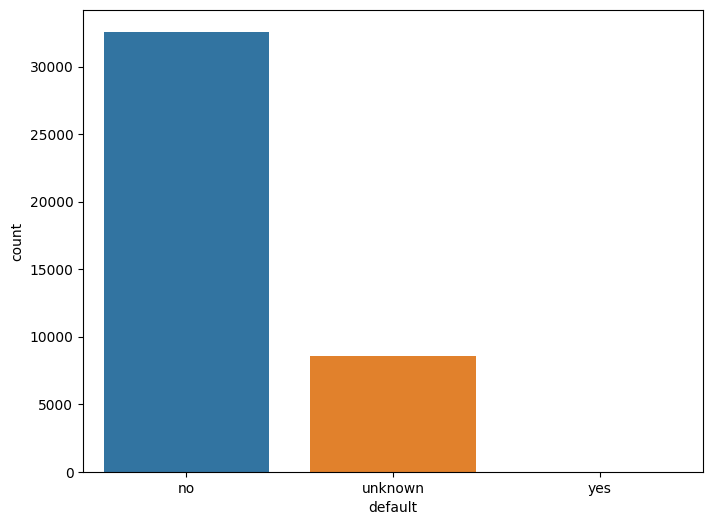

In [35]:
plt.figure (figsize=(8,6))
sns.countplot(data=df,x='default');

* Практически нет людей с просрочкой по кредиту.

---

## Кластеризация данных

### Подготовка данных

In [36]:
df.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
X = pd.get_dummies(df)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaled_X = scaler.fit_transform(X)

### Создание и обучение модели KMeans

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=2)

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
cluster_labels = model.fit_predict (scaled_X)

In [12]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
X['Cluster'] = cluster_labels

### Посмотрим корреляцию признаков с произведенной кластеризацией

In [14]:
X.corr()['Cluster'].iloc[:-1].sort_values()

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: Cluster, Length: 65, dtype: float64

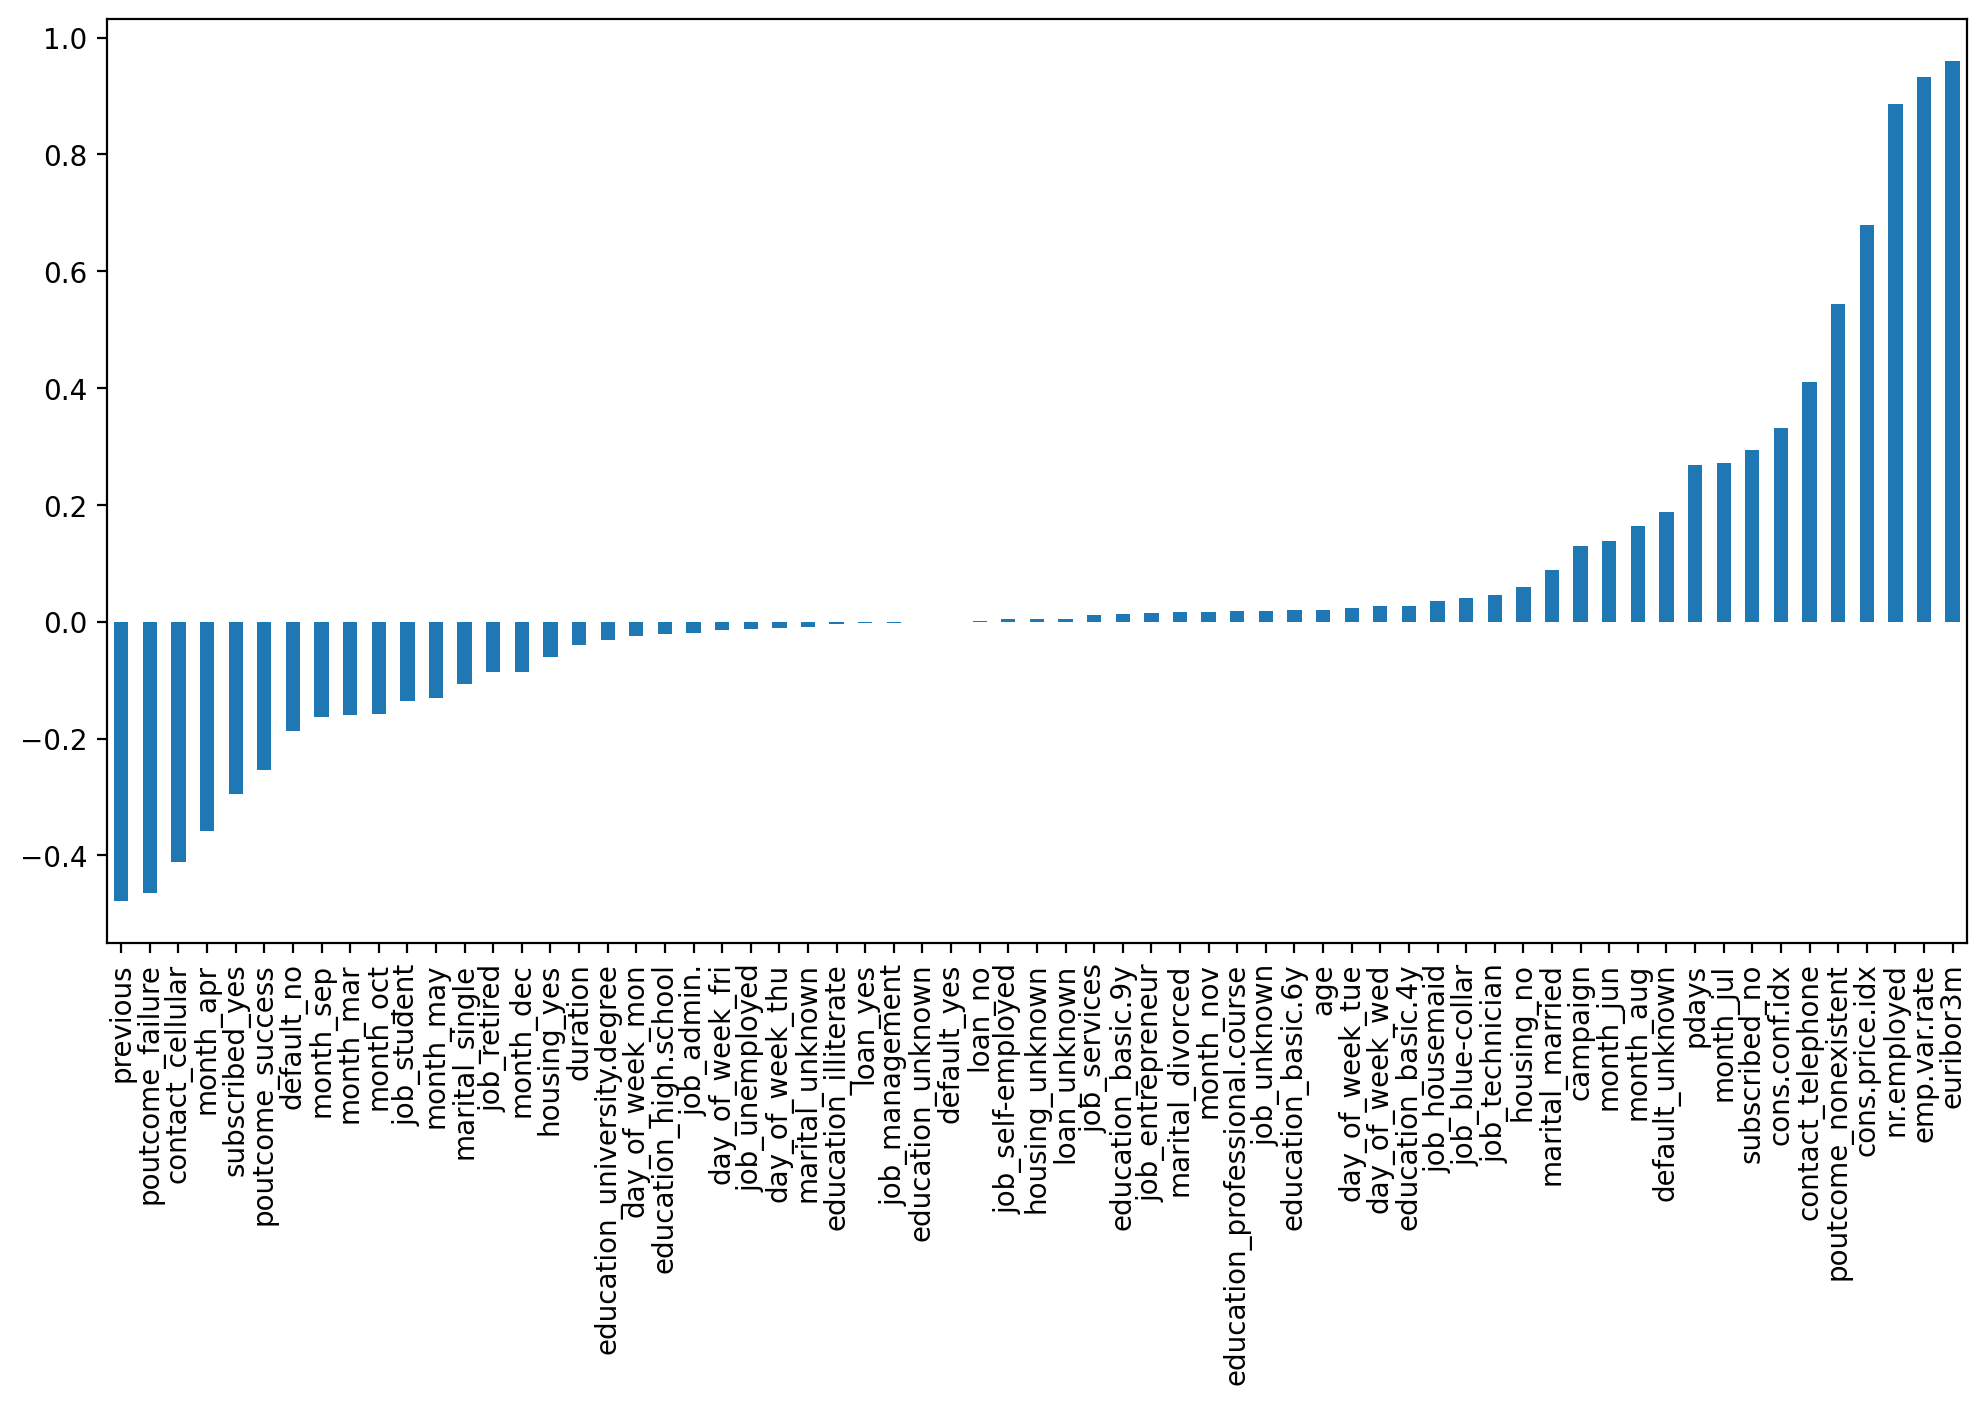

In [62]:
plt.figure(figsize = (12,6), dpi = 200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind = 'bar');

## Выбираем значение K

### Метод локтя и метрика SSD 

In [15]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

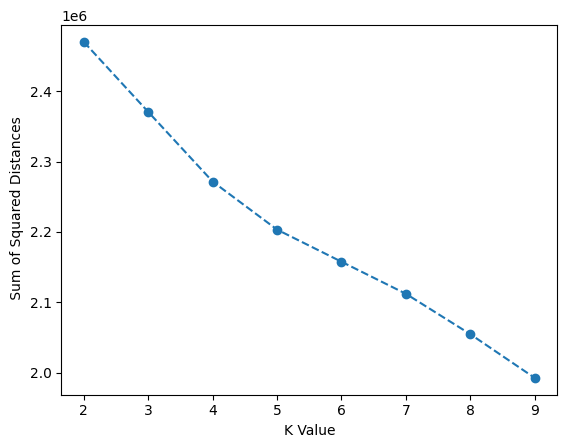

In [22]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

* Более пологие значения - с 5 по 6 и с 6 по 7.

### Проанализируем **уменьшение** метрики SSD

In [23]:
ssd

[2469792.3673020806,
 2370416.297653081,
 2271502.700771775,
 2203314.5462065954,
 2157695.0686274744,
 2112180.9701520037,
 2054819.4846995138,
 1992736.3731876086]

#### Разница между текущим и предыдущим значениями

In [27]:
pd.Series(ssd).diff()

0             NaN
1   -99376.069649
2   -98913.596881
3   -68188.154565
4   -45619.477579
5   -45514.098475
6   -57361.485452
7   -62083.111512
dtype: float64

In [26]:
pd.DataFrame(zip(range(2,10), pd.Series(ssd).diff()), columns = ['K', 'SSD diff'])

,K,SSD diff
0,2,NaN
1,3,-99376.069649
2,4,-98913.596881
3,5,-68188.154565
4,6,-45619.477579
5,7,-45514.098475
6,8,-57361.485452
7,9,-62083.111512


* Здесь мы наглядно видим, что от переход от 6 к 7 почти не дал разницы - значение "-45619" и "-45514"

### Метод силуэта и метрика silhouette_score

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
sil_scores  = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    sil_scores.append(silhouette_score(scaled_X, model.labels_))

In [31]:
sil_scores

[0.1170005119306553,
 0.04433273168348291,
 0.05864806561734392,
 0.07131440738217851,
 0.07201798706746478,
 0.07289074282977094,
 0.0719667878811428,
 0.07900087666280728]

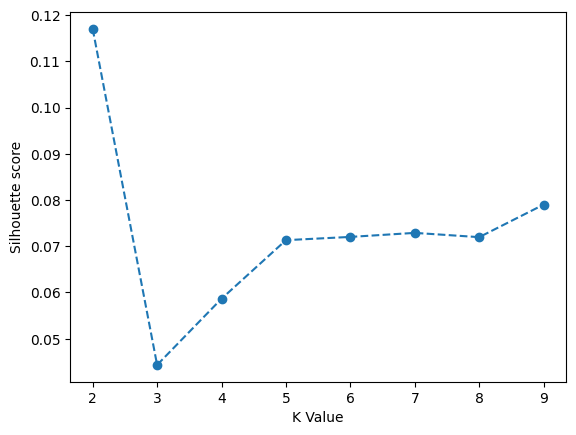

In [30]:
plt.plot(range(2,10), sil_scores,'o--')
plt.xlabel("K Value")
plt.ylabel("Silhouette score");